## EDA LAB

The General Social Survey (GSS) is a bi-annual nationally representative survey of Americans, with almost 7000 different questions asked since the survey began in the 1970s. It has straightforward questions about respondents' demographic information, but also questions like "Does your job regularly require you to perform repetitive or forceful hand movements or involve awkward postures?" or "How often do the demands of your job interfere with your family life?" There are a variety of controversial questions. No matter what you're curious about, there's something interesting in here to check out. The codebook is 904 pages (use CTRL+F to search it).

The data and codebook are available at:
https://gss.norc.org/us/en/gss/get-the-data.html

The datasets are so large that it might make sense to pick the variables you want, and then download just those variables from:
https://gssdataexplorer.norc.org/variables/vfilter

Here is your task:
1. Download a small (5-15) set of variables of interest.
2. Write a short description of the data you chose, and why. (1 page)
3. Load the data using Pandas. Clean them up for EDA. Do this in a notebook with comments or markdown chunks explaining your choices.
4. Produce some numeric summaries and visualizations. (1-3 pages)
5. Describe your findings in 1-2 pages.
6. If you have other content that you think absolutely must be included, you can include it in an appendix of any length.

For example, you might want to look at how aspects of a person's childhood family are correlated or not with their career or family choices as an adult. Or how political or religious affiliations correlate with drug use or sexual practices. It's an extremely wide-ranging survey.

Feel free to work with other people in groups, and ask questions!

In [51]:
import pandas as pd

# Load the dataset
file_path = 'https://raw.githubusercontent.com/Lisabyy/EDA/main/lab/GSS.xlsx'
df = pd.read_excel(file_path)
print(df.head())
print(df.describe())

   year  id_               hrs2            commute                educ  \
0  1972    1  .i:  Inapplicable  .i:  Inapplicable  4 years of college   
1  1972    2  .i:  Inapplicable  .i:  Inapplicable          10th grade   
2  1972    3  .i:  Inapplicable  .i:  Inapplicable          12th grade   
3  1972    4  .i:  Inapplicable  .i:  Inapplicable  5 years of college   
4  1972    5  .i:  Inapplicable  .i:  Inapplicable          12th grade   

                       speduc            res16 hompop             income  
0           .i:  Inapplicable  BIG-CITY SUBURB      1  .i:  Inapplicable  
1                  12th grade   CITY GT 250000      2  .i:  Inapplicable  
2                  11th grade   CITY GT 250000      4  .i:  Inapplicable  
3  8 or more years of college   CITY GT 250000      2  .i:  Inapplicable  
4                  12th grade    TOWN LT 50000      2  .i:  Inapplicable  
               year           id_
count  72390.000000  72390.000000
mean    1997.715541   1241.796395
std

In [52]:
import numpy as np

var_list = ['hrs2', 'commute', 'educ', 'speduc', 'res16', 'hompop', 'income']
numeric_cols = ["hrs2", "hompop", "commute"]
cat_cols = ["educ", "speduc", "res16", "income"]

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")

# Check for missing values
print("\nMissing values per column:")
print(df.isna().sum())

# Quick summary of numeric columns
print("\nNumeric columns summary:")
print(df[numeric_cols].describe())

# Quick check of categorical columns
for col in cat_cols:
    print(f"\n{col} categories and counts:")
    print(df[col].value_counts(dropna=False))

print(df.head())
print(df.info())


Missing values per column:
year           0
id_            0
hrs2       70993
commute    71068
educ           0
speduc         0
res16          0
hompop         6
income         0
dtype: int64

Numeric columns summary:
              hrs2        hompop      commute
count  1397.000000  72384.000000  1322.000000
mean     39.063708      0.113865    19.781392
std      13.303363     15.892318    16.052568
min       0.000000   -100.000000     0.000000
25%      35.000000      1.000000    10.000000
50%      40.000000      2.000000    15.000000
75%      45.000000      3.000000    30.000000
max      84.000000     16.000000    90.000000

educ categories and counts:
educ
12th grade                        21401
4 years of college                 9994
2 years of college                 8208
1 year of college                  5905
11th grade                         3942
3 years of college                 3307
10th grade                         3010
6 years of college                 2945
8th grade   

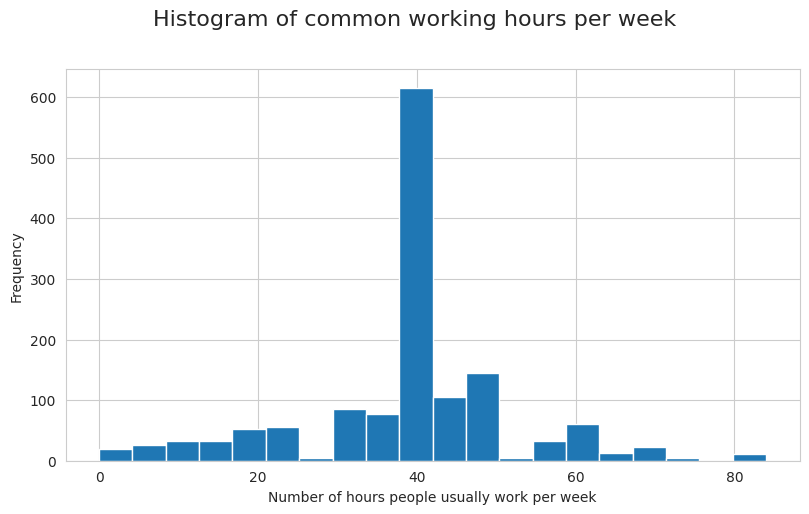

count    1397.000000
mean       39.063708
std        13.303363
min         0.000000
25%        35.000000
50%        40.000000
75%        45.000000
max        84.000000
Name: hrs2, dtype: float64


In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

df['hrs2'].hist(bins=20, figsize=(8, 5))
plt.suptitle("Histogram of common working hours per week", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.xlabel("Number of hours people usually work per week")
plt.ylabel("Frequency")
plt.show()

print(df['hrs2'].describe())

Correlation between common working hours per week and commute time: 0.033


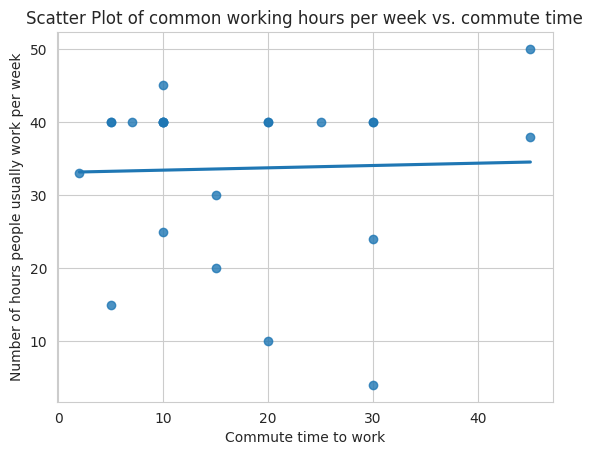

In [54]:
corr_value = df['hrs2'].corr(df['commute'])
print(f"Correlation between common working hours per week and commute time: {corr_value:.3f}")

# Create a scatter plot with a regression line
sns.set_style("whitegrid")
sns.regplot(x='commute', y='hrs2', data=df, ci=None)

plt.title("Scatter Plot of common working hours per week vs. commute time")
plt.xlabel("Commute time to work")
plt.ylabel("Number of hours people usually work per week")
plt.show()

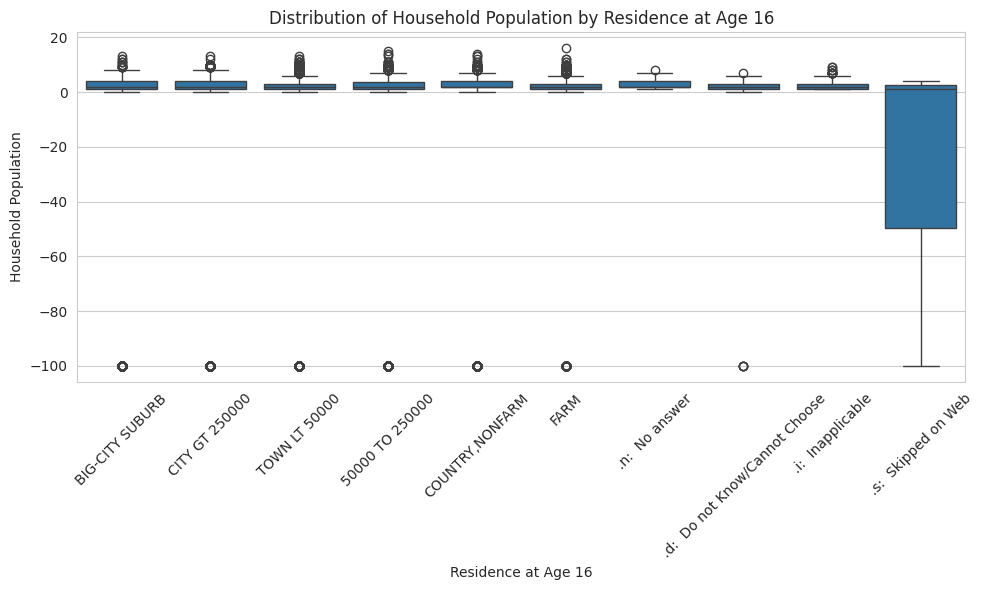

In [55]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='res16', y='hompop', data=df)
plt.title("Distribution of Household Population by Residence at Age 16")
plt.xlabel("Residence at Age 16")
plt.ylabel("Household Population")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [59]:
print(df['educ'].dtype)
print(df['speduc'].dtype)

contingency_table = pd.crosstab(df['educ'], df['speduc'])
print(contingency_table)

from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(contingency_table)
print("Chi-square Statistic:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)

object
object
speduc                          .d:  Do not Know/Cannot Choose  \
educ                                                             
.d:  Do not Know/Cannot Choose                              17   
.n:  No answer                                               6   
1 year of college                                           12   
10th grade                                                  28   
11th grade                                                  27   
12th grade                                                  83   
1st grade                                                    0   
2 years of college                                          20   
2nd grade                                                    2   
3 years of college                                          10   
3rd grade                                                    8   
4 years of college                                          12   
4th grade                                                    7

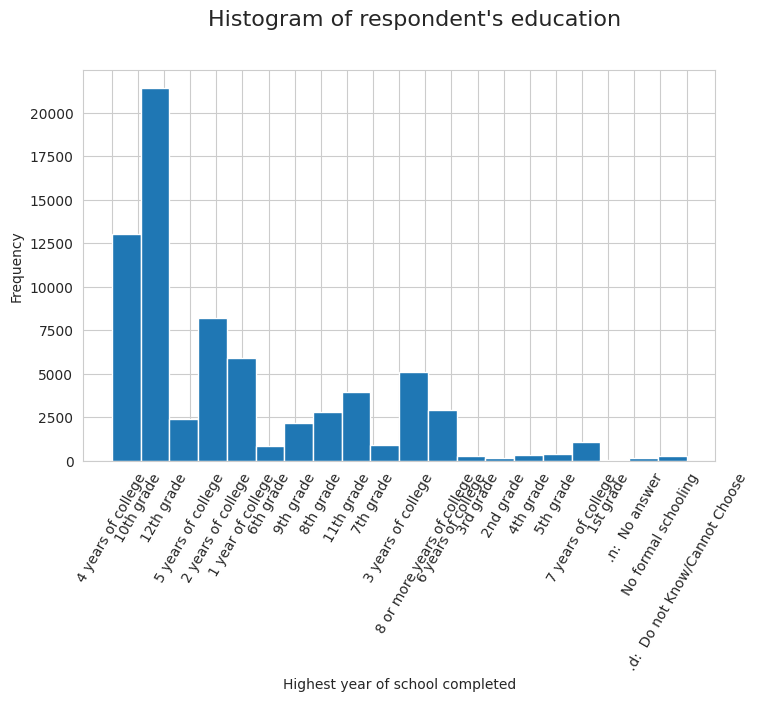

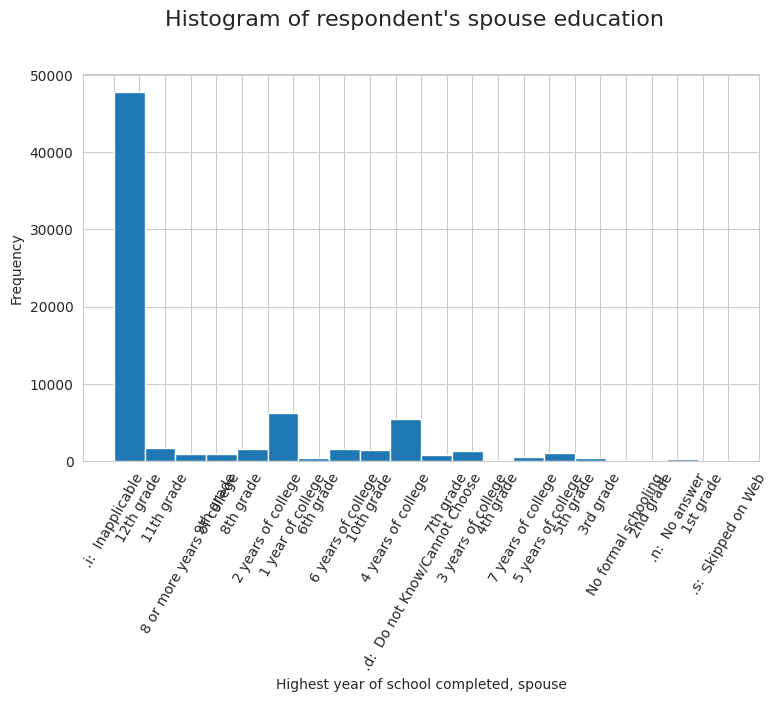

In [63]:
df['educ'].hist(bins=20, figsize=(8, 5))
plt.suptitle("Histogram of respondent's education", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.xlabel("Highest year of school completed")
plt.ylabel("Frequency")
plt.xticks(rotation=60)
plt.show()

df['speduc'].hist(bins=20, figsize=(8, 5))
plt.suptitle("Histogram of respondent's spouse education", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.xlabel("Highest year of school completed, spouse")
plt.ylabel("Frequency")
plt.xticks(rotation=60)
plt.show()